In [153]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import pickle
import os
import missingno as msno
import shapely.io
from shapely.geometry import Point, LineString

from lxml import etree
from datetime import time

# Load `centros_docentes_12-11-2024.xls`

In [154]:
columns_to_keep = [
 'Codigo',
 # 'Denominacion_Generica_ES',
 # 'Denominacion_Generica_VAL',
 # 'Denominacion_Especifica',
 'Denominacion',
 'Regimen',
 # 'Tipo_Via',
 'Direccion',
 'Num',
 'Codigo_postal',
 'Localidad',
 'Provincia',
 'Telefono',
 # 'Fax',
 # 'COD_EDIFICACION', # solo tiene un valor de 1
 'long',
 'lat',
 'Titularidad',
 'CIF',
 'Comarca',
]

centros = pd.read_excel('data/centros_docentes_12-11-2024.xls',
                        usecols=columns_to_keep)
centros

WARNING *** file size (2743830) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Codigo,Denominacion,Regimen,Direccion,Num,Codigo_postal,Localidad,Provincia,Telefono,long,lat,Titularidad,CIF,Comarca
0,3001829,CENTRE PRIVAT MÉDICO PEDRO HERRERO,Priv. Conc.,VICTOR DE LA SERNA,37-39,3006,ALACANT,Alacant,965102455,-0.515928,38.349410,NaN,NaN,L'ALACANTÍ
1,3001854,CEIP ÓSCAR ESPLÁ,Púb.,DE LA LIBERTAD,1,3010,ALACANT,Alacant,965937105,-0.493805,38.365862,GENERALITAT VALENCIANA,Q5355091I,L'ALACANTÍ
2,3001881,IES JORGE JUAN,Púb.,WENCESLAO FERNÁNDEZ FLORES,2,3004,ALACANT,Alacant,965936490,-0.493033,38.349339,GENERALITAT VALENCIANA,Q5355571J,L'ALACANTÍ
3,3001891,IES MIGUEL HERNÁNDEZ,Púb.,POETA GARCILASO,8,3005,ALACANT,Alacant,965936545,-0.495388,38.350607,GENERALITAT VALENCIANA,Q5355570B,L'ALACANTÍ
4,3001908,IES FIGUERAS PACHECO,Púb.,FERNANDO MADROÑAL,35,3007,ALACANT,Alacant,965936495,-0.511393,38.340419,GENERALITAT VALENCIANA,Q5355573F,L'ALACANTÍ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,46037595,ESCOLA PÚBLICA DÀRTS ESCÈNIQUES EMT,Púb.,PERE EL GRAN,S/N,46460,SILLA,València,NaN,-0.410963,39.367708,AJUNTAMENT SILLA,NaN,L'HORTA SUD
3703,46037601,EI 1er CICLO,Púb.,SAN JUAN,19,46177,TUÉJAR,València,NaN,-1.042304,39.766940,GENERALITAT VALENCIANA,Q4601602H,LA SERRANÍA
3704,46037650,CENTRE PRIVAT FP CEAC,Priv.,DE LA ILUSTRACIÓN,4,46100,BURJASSOT,València,963106810,0.000000,0.000000,NaN,NaN,L'HORTA NORD
3705,46037674,CENTRE PRIV. ED. INF. 1er CICLE EL PATI,Priv.,SANT JOAN,36,46530,PUÇOL,València,679609380,-0.301047,39.616454,NaN,NaN,L'HORTA NORD


In [155]:
centros.dtypes

Codigo             int64
Denominacion      object
Regimen           object
Direccion         object
Num               object
Codigo_postal      int64
Localidad         object
Provincia         object
Telefono          object
long             float64
lat              float64
Titularidad       object
CIF               object
Comarca           object
dtype: object

<Axes: >

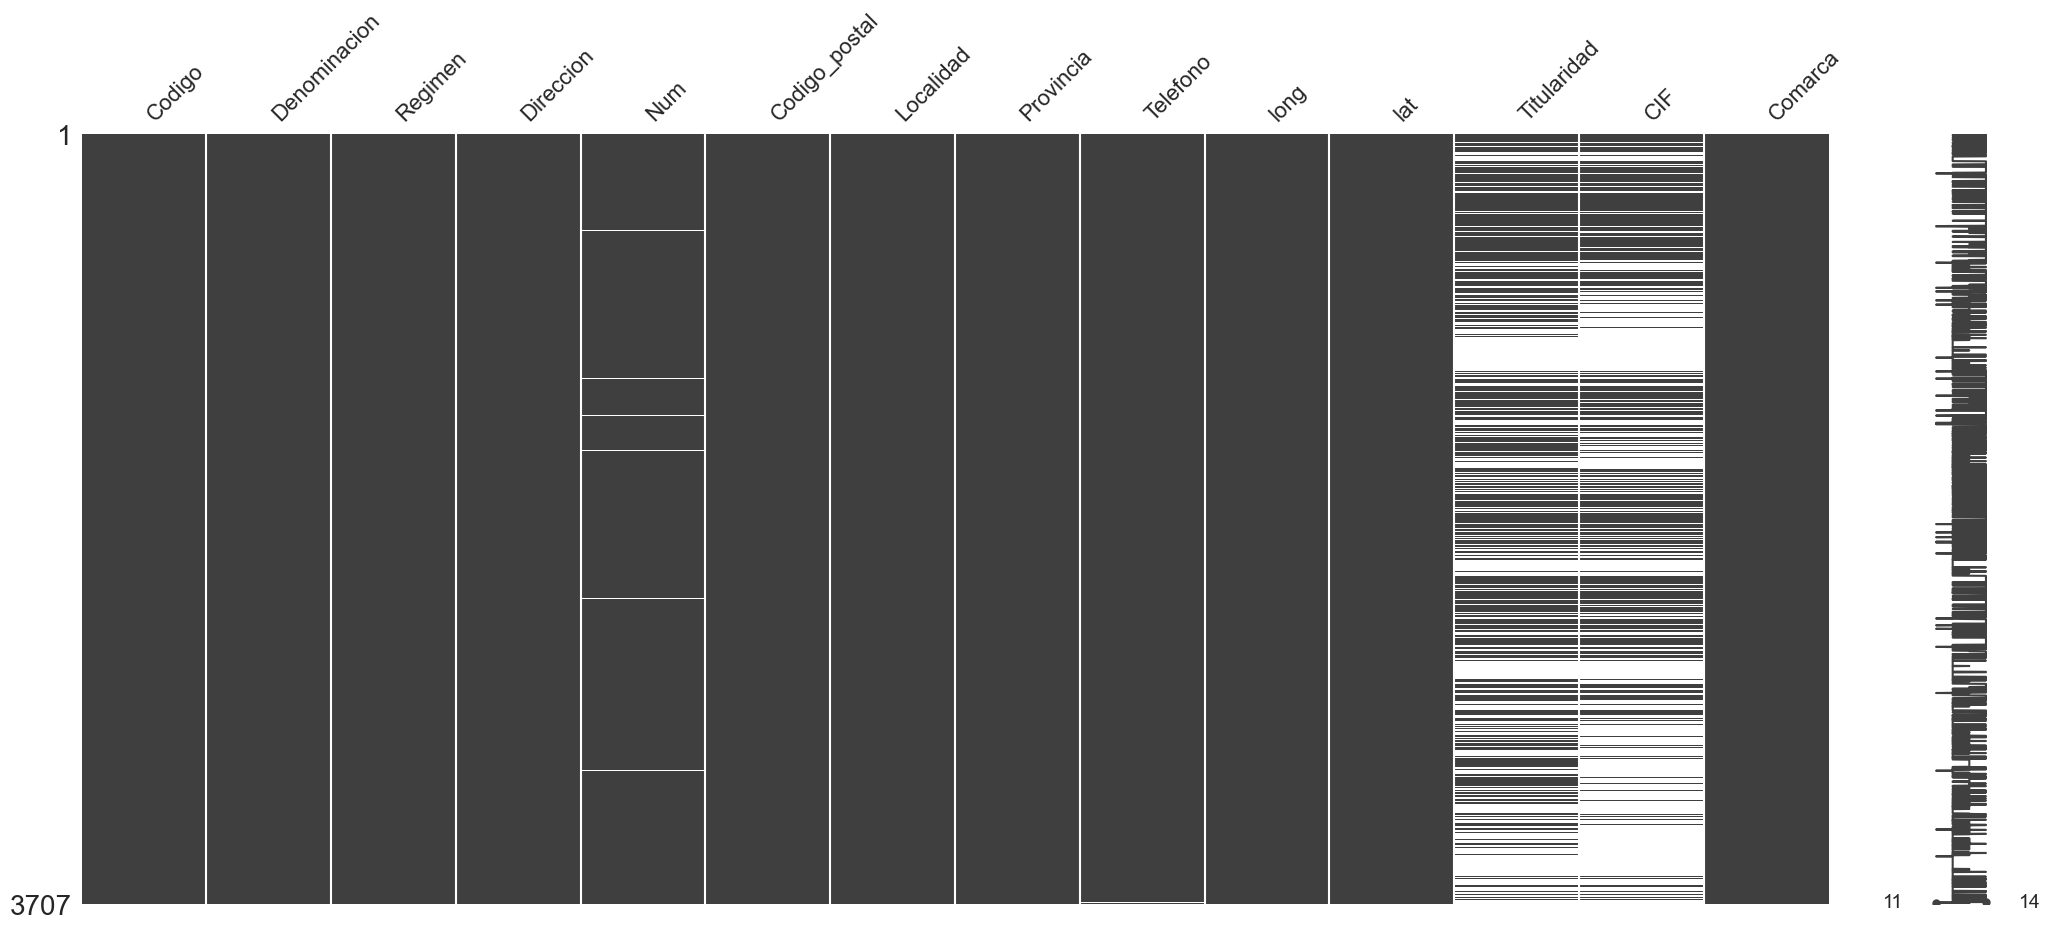

In [156]:
msno.matrix(centros)

## Create GeoDataframe

In [157]:
centros['geometry'] = centros.apply(lambda row: Point(row.long, row.lat), axis=1)
centros['geometry'].head()

0     POINT (-0.515928 38.34941)
1    POINT (-0.493805 38.365862)
2    POINT (-0.493033 38.349339)
3    POINT (-0.495388 38.350607)
4    POINT (-0.511393 38.340419)
Name: geometry, dtype: object

In [158]:
centros_gdf = gpd.GeoDataFrame(centros, geometry='geometry', crs='EPSG:4326')

In [159]:
centros_gdf.to_file('data/centros_shp/centros.shp', driver='ESRI Shapefile')

/var/folders/1v/srd66w2n4cl1_mmpzwfprky40000gn/T/ipykernel_32349/637932534.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  centros_gdf.to_file('data/centros_shp/centros.shp', driver='ESRI Shapefile')
/Users/family/PycharmProjects/UPV/.venv/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Denominacion' to 'Denominaci'
  ogr_write(
/Users/family/PycharmProjects/UPV/.venv/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Codigo_postal' to 'Codigo_pos'
  ogr_write(
/Users/family/PycharmProjects/UPV/.venv/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Titularidad' to 'Titularida'
  ogr_write(


## Regimen statistics

In [160]:
centros['Regimen'].value_counts(), centros_gdf['Regimen'].value_counts(normalize=True)

(Regimen
 Púb.           2079
 Priv.          1215
 Priv. Conc.     413
 Name: count, dtype: int64,
 Regimen
 Púb.           0.560831
 Priv.          0.327758
 Priv. Conc.    0.111411
 Name: proportion, dtype: float64)

<Axes: ylabel='proportion'>

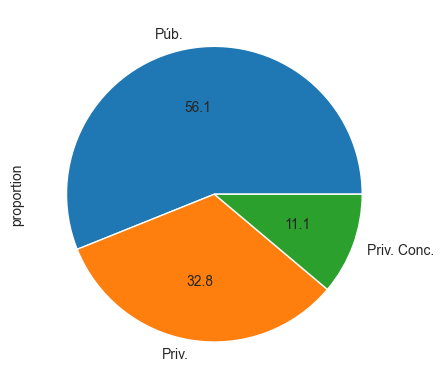

In [161]:
centros_gdf['Regimen'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f')

### By province

In [162]:
[*['red']*3, *['blue']*3, *['green']*3]

['red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'green', 'green']

<Axes: ylabel='proportion'>

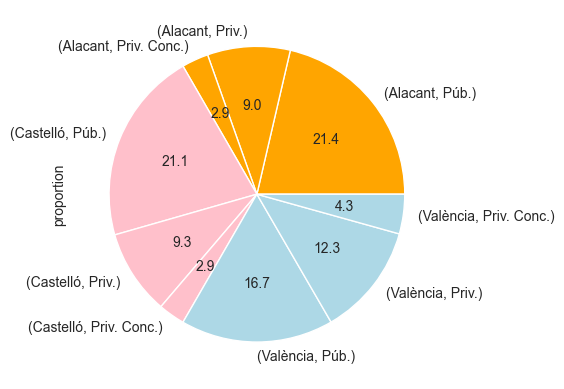

In [163]:
centros_gdf.groupby('Provincia')['Regimen'].value_counts(normalize=True).plot(kind='pie', 
                                                                              colors=[*['orange']*3, *['pink']*3, *['lightblue']*3], 
                                                                              autopct='%1.1f')

### Titularidad statistics

In [164]:
centros_gdf['Titularidad'].fillna('Unknown').value_counts()

Titularidad
GENERALITAT VALENCIANA    1631
Unknown                   1628
AJUNTAMENT DE VALÈNCIA      15
AJUNTAMENT DE GANDIA         5
AJUNTAMENT D'ALCOI           5
                          ... 
AJUNTAMENT DE GODELLA        1
AJUNTAMENT D'AGOST           1
AJUNTAMENT D'ALMOINES        1
AJUNTAMENT DE XIXONA         1
AJUNTAMENT SILLA             1
Name: count, Length: 274, dtype: int64

In [165]:
# are all centers w titularidad public? 

centros_gdf.loc[centros_gdf['Titularidad'].notna(), 'Regimen'].value_counts()

Regimen
Púb.    2079
Name: count, dtype: int64

In [166]:
# are all centers wo titularidad private? 

centros_gdf.loc[centros_gdf['Titularidad'].isna(), 'Regimen'].value_counts()

Regimen
Priv.          1215
Priv. Conc.     413
Name: count, dtype: int64

In [167]:
centros_gdf['is_municipal'] = centros_gdf['Titularidad'].notna()

# Load escolarizacion 2024

In [168]:
escolarizacion2024 = pd.read_csv('data/resumen-de-escolarizacion_2024.csv', sep=';')
escolarizacion2024

,CURSO_ACAD,COD_CENTRO,NOM_CENTRO,REG_JUR,COD_TIPO,DESC_TIPO_ES,DESC_TIPO_VA,LOCALIDAD,COD_MUN,NOM_MUN_OF,...,NOM_PROV_VA,COD_ENSE,DESC_ENSE_ES,DESC_ENSE_VA,COD_CURSO,IDIOMA,MUJERES,HOMBRES,OTROS,TOTAL_MATRICULACIONES
0,2024,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,2INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,10,8,0,18
1,2024,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,3INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,15,6,0,21
2,2024,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,4INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,7,16,0,23
3,2024,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,5INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,8,13,0,21
4,2024,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,1PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,14,13,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18679,2024,46006707,CEIP EUGENIO MARTÍ SANCHIS,PUB,P,PÚBLICO,PÚBLIC,BENICULL DE XÚQUER,46904,BENICULL DE XÚQUER,...,VALENCIA/VALÈNCIA,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,2PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,6,4,0,10
18680,2024,46006707,CEIP EUGENIO MARTÍ SANCHIS,PUB,P,PÚBLICO,PÚBLIC,BENICULL DE XÚQUER,46904,BENICULL DE XÚQUER,...,VALENCIA/VALÈNCIA,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,3PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,1,4,0,5
18681,2024,46006707,CEIP EUGENIO MARTÍ SANCHIS,PUB,P,PÚBLICO,PÚBLIC,BENICULL DE XÚQUER,46904,BENICULL DE XÚQUER,...,VALENCIA/VALÈNCIA,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,4PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,4,4,0,8
18682,2024,46006707,CEIP EUGENIO MARTÍ SANCHIS,PUB,P,PÚBLICO,PÚBLIC,BENICULL DE XÚQUER,46904,BENICULL DE XÚQUER,...,VALENCIA/VALÈNCIA,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,5PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,1,6,0,7


In [169]:
matriculaciones2024 = escolarizacion2024.groupby(['COD_CENTRO', 'NOM_CENTRO', 'REG_JUR'])['TOTAL_MATRICULACIONES'].sum().sort_values(ascending=False).to_frame()
matriculaciones2024['rank_2024'] = matriculaciones2024.rank(ascending=False, method='dense')
matriculaciones2024

,,,TOTAL_MATRICULACIONES,rank_2024
COD_CENTRO,NOM_CENTRO,REG_JUR,,
3000849,CENTRE PRIVAT INMACULADA,PRI,1654,1.0
46012094,CENTRE PRIVAT ESCUELAS SAN JOSÉ (I. POLIT.),PRI,1654,1.0
3001167,CENTRE PRIVAT SAGRADO CORAZÓN HH. MARISTAS,PRI,1644,2.0
3007388,CENTRO PRIVADO DIOCESANO SANTO DOMINGO,PRI,1605,3.0
46010905,CENTRE PRIVAT SALESIANOS SAN ANTONIO ABAD,PRI,1590,4.0
...,...,...,...,...
3008733,CEIP EL PUIG,PUB,8,785.0
3003851,CEIP DE CONFRIDES,PUB,7,786.0
46009903,CENTRE PRIVAT ACADEMIA JARDÍN,PRI,4,787.0


# Load escolarizacion 2023

In [170]:
escolarizacion2023 = pd.read_csv('data/resumen-de-escolarizacion_2023.csv', sep=';')
escolarizacion2023

,CURSO_ACAD,COD_CENTRO,NOM_CENTRO,REG_JUR,COD_TIPO,DESC_TIPO_ES,DESC_TIPO_VA,LOCALIDAD,COD_MUN,NOM_MUN_OF,...,NOM_PROV_VA,COD_ENSE,DESC_ENSE_ES,DESC_ENSE_VA,COD_CURSO,IDIOMA,MUJERES,HOMBRES,OTROS,TOTAL_MATRICULACIONES
0,2023,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,2INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,14,4,0,18
1,2023,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,3INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,7,15,0,22
2,2023,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,4INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,8,13,0,21
3,2023,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,5INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,15,13,0,28
4,2023,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,...,ALICANTE/ALACANT,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,1PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,8,12,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18483,2023,46006707,CEIP EUGENIO MARTÍ SANCHIS,PUB,P,PÚBLICO,PÚBLIC,BENICULL DE XÚQUER,46904,BENICULL DE XÚQUER,...,VALENCIA/VALÈNCIA,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,2PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,1,4,0,5
18484,2023,46006707,CEIP EUGENIO MARTÍ SANCHIS,PUB,P,PÚBLICO,PÚBLIC,BENICULL DE XÚQUER,46904,BENICULL DE XÚQUER,...,VALENCIA/VALÈNCIA,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,3PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,4,4,0,8
18485,2023,46006707,CEIP EUGENIO MARTÍ SANCHIS,PUB,P,PÚBLICO,PÚBLIC,BENICULL DE XÚQUER,46904,BENICULL DE XÚQUER,...,VALENCIA/VALÈNCIA,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,4PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,1,6,0,7
18486,2023,46006707,CEIP EUGENIO MARTÍ SANCHIS,PUB,P,PÚBLICO,PÚBLIC,BENICULL DE XÚQUER,46904,BENICULL DE XÚQUER,...,VALENCIA/VALÈNCIA,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,5PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,1,2,0,3


In [171]:
escolarizacion2023.groupby('NOM_PROV_ES')['LOCALIDAD'].nunique()

NOM_PROV_ES
ALICANTE/ALACANT      145
CASTELLÓN/CASTELLÓ     71
VALENCIA/VALÈNCIA     225
Name: LOCALIDAD, dtype: int64

In [172]:
escolarizacion2023.groupby('NOM_PROV_ES')['NOM_MUN_OF'].nunique()

NOM_PROV_ES
ALICANTE/ALACANT      108
CASTELLÓN/CASTELLÓ     68
VALENCIA/VALÈNCIA     206
Name: NOM_MUN_OF, dtype: int64

<Axes: >

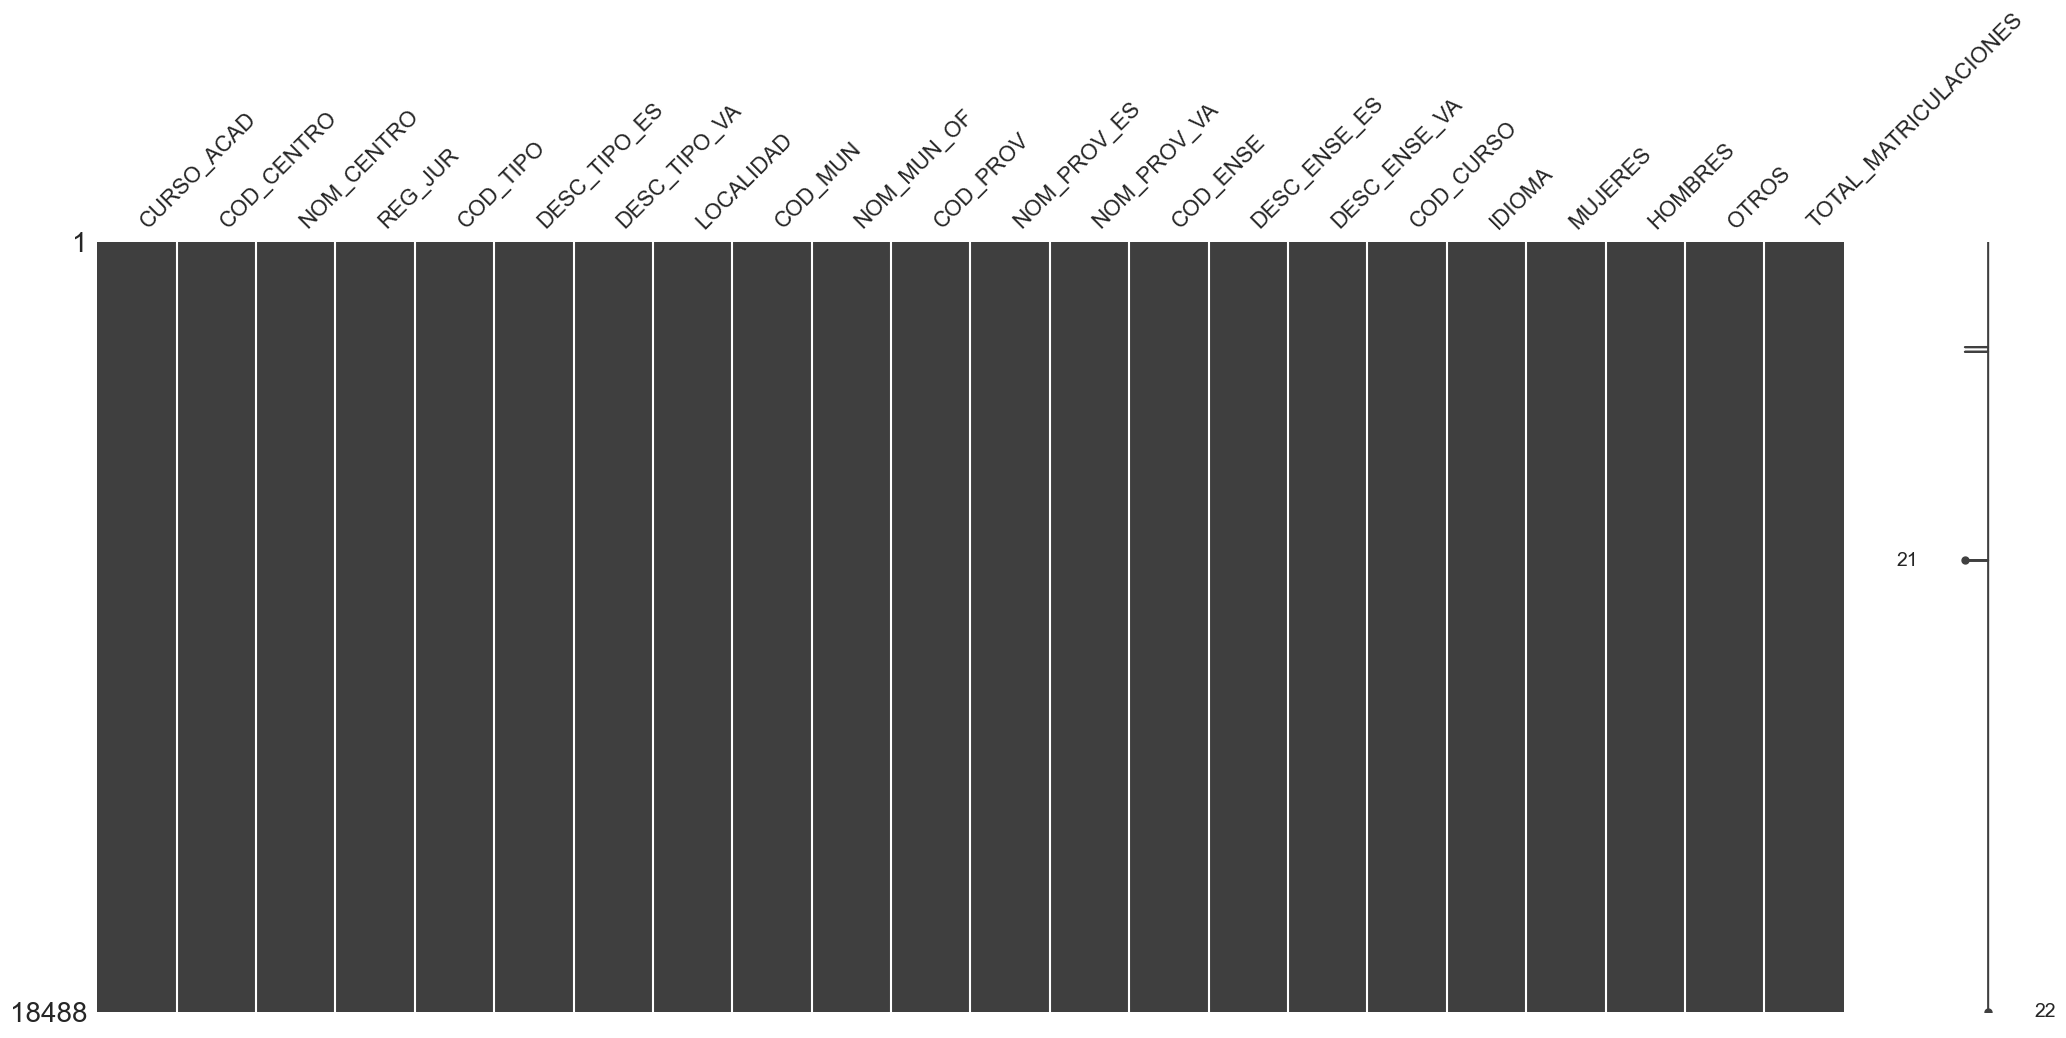

In [173]:
msno.matrix(escolarizacion2023)

In [174]:
escolarizacion2023.groupby('COD_CENTRO').first()['REG_JUR'].value_counts()

# hay que sacar Regimen de centros y contrastar que centros son privados y que privados-concertados

REG_JUR
PUB    1460
PRI     434
Name: count, dtype: int64

In [175]:
escolarizacion2023.groupby('COD_CENTRO').first().groupby('NOM_PROV_ES')['REG_JUR'].value_counts()

# hay que sacar Regimen de centros y contrastar que centros son privados y que privados-concertados

NOM_PROV_ES         REG_JUR
ALICANTE/ALACANT    PUB        548
                    PRI        114
CASTELLÓN/CASTELLÓ  PUB        215
                    PRI         39
VALENCIA/VALÈNCIA   PUB        697
                    PRI        281
Name: count, dtype: int64

In [176]:
# top matriculaciones

matriculaciones2023 = escolarizacion2023.groupby(['COD_CENTRO', 'NOM_CENTRO', 'REG_JUR'])['TOTAL_MATRICULACIONES'].sum().sort_values(ascending=False).to_frame()
matriculaciones2023['rank_2023'] = matriculaciones2023.rank(ascending=False, method='dense')
matriculaciones2023

,,,TOTAL_MATRICULACIONES,rank_2023
COD_CENTRO,NOM_CENTRO,REG_JUR,,
3001167,CENTRE PRIVAT SAGRADO CORAZÓN HH. MARISTAS,PRI,1674,1.0
46012094,CENTRE PRIVAT ESCUELAS SAN JOSÉ (I. POLIT.),PRI,1656,2.0
3000849,CENTRE PRIVAT INMACULADA,PRI,1644,3.0
46010905,CENTRE PRIVAT SALESIANOS SAN ANTONIO ABAD,PRI,1592,4.0
3007388,CENTRO PRIVADO DIOCESANO SANTO DOMINGO,PRI,1578,5.0
...,...,...,...,...
3003851,CEIP DE CONFRIDES,PUB,8,777.0
12006056,SECCIÓ DE L'IES MATILDE SALVADOR A CASTELLÓ DE LA PLANA,PUB,6,778.0
12003717,CEIP SAN VICENTE DE PIEDRAHITA,PUB,2,779.0


# Loas escolarizacion 2022

In [177]:
escolarizacion2022 = pd.read_csv('data/resumen-de-escolarizacion_2022.csv', sep=';')
escolarizacion2022 = escolarizacion2022.rename(columns={'MATRICULADOS':'TOTAL_MATRICULACIONES'})
escolarizacion2022

,CURSO_ACAD,COD_CENTRO,NOM_CENTRO,REG_JUR,COD_TIPO,DESC_TIPO_ES,DESC_TIPO_VA,LOCALIDAD,COD_MUN,NOM_MUN_OF,COD_PROV,NOM_PROV_ES,NOM_PROV_VA,COD_ENSE,DESC_ENSE_ES,DESC_ENSE_VA,COD_CURSO,IDIOMA,TOTAL_MATRICULACIONES
0,2022,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,3,ALICANTE/ALACANT,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,2INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,18
1,2022,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,3,ALICANTE/ALACANT,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,3INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,23
2,2022,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,3,ALICANTE/ALACANT,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,4INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,27
3,2022,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,3,ALICANTE/ALACANT,ALICANTE/ALACANT,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,5INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,23
4,2022,3000047,CEIP LA RAMBLA,PUB,P,PÚBLICO,PÚBLIC,AGOST,3002,AGOST,3,ALICANTE/ALACANT,ALICANTE/ALACANT,2,EDUCACIÓN PRIMARIA,EDUCACIÓ PRIMÀRIA,1PRI,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18152,2022,46037339,EI 1ER CICLE EL CASTELL,PUB,P,PÚBLICO,PÚBLIC,POBLA LLARGA (LA),46203,"POBLA LLARGA, LA",46,VALENCIA/VALÈNCIA,VALENCIA/VALÈNCIA,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,1INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,36
18153,2022,46037339,EI 1ER CICLE EL CASTELL,PUB,P,PÚBLICO,PÚBLIC,POBLA LLARGA (LA),46203,"POBLA LLARGA, LA",46,VALENCIA/VALÈNCIA,VALENCIA/VALÈNCIA,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,2INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,28
18154,2022,46037340,EI 1ER CICLE RIU ALBAIDA,PUB,P,PÚBLICO,PÚBLIC,SENYERA,46227,SENYERA,46,VALENCIA/VALÈNCIA,VALENCIA/VALÈNCIA,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,0INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,2
18155,2022,46037340,EI 1ER CICLE RIU ALBAIDA,PUB,P,PÚBLICO,PÚBLIC,SENYERA,46227,SENYERA,46,VALENCIA/VALÈNCIA,VALENCIA/VALÈNCIA,1,EDUCACIÓN INFANTIL,EDUCACIÓ INFANTIL,1INF,PROGRAMA DE EDUCACIÓN PLURILINGÜE E INTERCULTURAL,6


In [178]:
matriculaciones2022 = escolarizacion2022.groupby(['COD_CENTRO', 'NOM_CENTRO', 'REG_JUR'])['TOTAL_MATRICULACIONES'].sum().sort_values(ascending=False).to_frame()
matriculaciones2022['rank_2022'] = matriculaciones2022.rank(ascending=False, method='dense')
matriculaciones2022

,,,TOTAL_MATRICULACIONES,rank_2022
COD_CENTRO,NOM_CENTRO,REG_JUR,,
3001167,CENTRE PRIVAT SAGRADO CORAZÓN HH. MARISTAS,PRI,1667,1.0
3000849,CENTRE PRIVAT INMACULADA,PRI,1658,2.0
46012094,CENTRE PRIVAT ESCUELAS SAN JOSÉ (I. POLIT.),PRI,1644,3.0
46010905,CENTRE PRIVAT SALESIANOS SAN ANTONIO ABAD,PRI,1612,4.0
3007388,CENTRO PRIVADO DIOCESANO SANTO DOMINGO,PRI,1584,5.0
...,...,...,...,...
12003213,CEIP SANTA ANA,PUB,9,776.0
3003851,CEIP DE CONFRIDES,PUB,9,776.0
12003717,CEIP SAN VICENTE DE PIEDRAHITA,PUB,3,777.0


In [181]:
matriculaciones2024.join(matriculaciones2023, rsuffix='_2023', how='left').join(matriculaciones2022, rsuffix='_2022', how='left').dropna().astype(int).sort_values(ascending=False, by=['TOTAL_MATRICULACIONES', 'TOTAL_MATRICULACIONES_2023', 'TOTAL_MATRICULACIONES_2022']).rename(columns={'TOTAL_MATRICULACIONES':'TOTAL_MATRICULACIONES_2024'})

,,,TOTAL_MATRICULACIONES_2024,rank_2024,TOTAL_MATRICULACIONES_2023,rank_2023,TOTAL_MATRICULACIONES_2022,rank_2022
COD_CENTRO,NOM_CENTRO,REG_JUR,,,,,,
46012094,CENTRE PRIVAT ESCUELAS SAN JOSÉ (I. POLIT.),PRI,1654,1,1656,2,1644,3
3000849,CENTRE PRIVAT INMACULADA,PRI,1654,1,1644,3,1658,2
3001167,CENTRE PRIVAT SAGRADO CORAZÓN HH. MARISTAS,PRI,1644,2,1674,1,1667,1
3007388,CENTRO PRIVADO DIOCESANO SANTO DOMINGO,PRI,1605,3,1578,5,1584,5
46010905,CENTRE PRIVAT SALESIANOS SAN ANTONIO ABAD,PRI,1590,4,1592,4,1612,4
...,...,...,...,...,...,...,...,...
12003213,CEIP SANTA ANA,PUB,8,785,11,775,9,776
3003851,CEIP DE CONFRIDES,PUB,7,786,8,777,9,776
46009903,CENTRE PRIVAT ACADEMIA JARDÍN,PRI,4,787,325,487,318,487


# Intersection

In [57]:
set_centros = set(centros['Codigo'])
set_escolarizacion = set(escolarizacion['COD_CENTRO'])

len(set_centros), len(set_escolarizacion)

(3707, 1894)

In [58]:
len(set_centros.intersection(set_escolarizacion))

1892

In [62]:
# are there only public and charter schools in escolarizacion? 

centros_gdf.loc[centros_gdf['Codigo'].isin(set_centros.intersection(set_escolarizacion)), 'Regimen'].value_counts()

# no

Regimen
Púb.           1460
Priv. Conc.     383
Priv.            49
Name: count, dtype: int64